<center><h1>Stock Market Prediction</h1></center>
    <img src = "https://www.umpindex.com/images/UMPI-Stock-Market-Projection-Software.png">
    

Table of contents:

1. [Import relevant libraries](#Libraries)
2. [Load files](#Load)
3. [Data Exploration](#Exploration)
4. [EDA(Exploratory Data Analysis)](#EDA)
5. [Data Cleaning](#Cleaning)
6. [Correlations & Distributions ](#Correlations)
7. [Splitting the Data](#Splitting)
8. [Model training](#Model)
9. [Test set predictions](#Predictions)

<a name = "Libraries"></a>
## 1. Import relevant libraries

In [1]:
# Install xgboost
# !pip install xgboost

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

<a name = "Load"></a>
## 2. Load files

In [3]:
# Read files to pandas dataframes
# Using data from stocks from different famous companies.
df = pd.read_csv('AAPL_data.csv')
df1 = pd.read_csv('NVDA_data.csv')
df2 = pd.read_csv('AMZN_data.csv')
df3 = pd.read_csv('GOOGL_data.csv')
df4 = pd.read_csv('HP_data.csv')
df5 = pd.read_csv('IBM_data.csv')

The data is stocks from Apple,Nvidia,Amazon,Google,Hp and IBM so we need to concat those datasets together into one.

In [4]:
# Converting data from csv to pandas Dataframes.
data = pd.DataFrame(df)

In [5]:
# Merging all datasets together
data=pd. concat([df,df1,df2,df3,df4,df5],axis=0) 
print(data)

            date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  163.1900  164.1300  161.9000  162.4000    4434242   IBM
1255  2018-02-02  161.7000  162.0000  158.8663  159.0300    5251938   IBM
1256  2018-02-05  157.8900  158.5000  150.0000  152.5300    8746599   IBM
1257  2018-02-06  150.2900  155.4900  149.1100  155.3400    9867678   IBM
1258  2018-02-07  154.1700  155.3400  153.2800  153.8500    6149207   IBM

[7554 rows x 7 columns]


<a name = "Exploration"></a>
## 3. Data Exploration

In [6]:
#Checking the data distribution
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [7]:
data.describe()

,open,high,low,close,volume
count,7554.000000,7554.00000,7554.000000,7554.000000,7.554000e+03
mean,276.919606,279.23813,274.378244,276.917367,1.280463e+07
std,290.473020,292.61845,288.015558,290.455560,2.335958e+07
min,12.070000,12.29000,12.040000,12.126000,3.248960e+05
25%,69.147500,70.00250,68.326950,69.072500,2.175206e+06
50%,152.275000,153.33500,151.365000,152.370000,3.794822e+06
75%,426.395000,430.23965,423.114600,425.875025,9.246296e+06
max,1477.390000,1498.00000,1450.040000,1450.890000,2.668336e+08


In [8]:
data.duplicated().value_counts()

False    7554
dtype: int64

No duplications that's great.

<a name = "EDA"></a>
## 4. EDA(Exploratory Data Analysis)


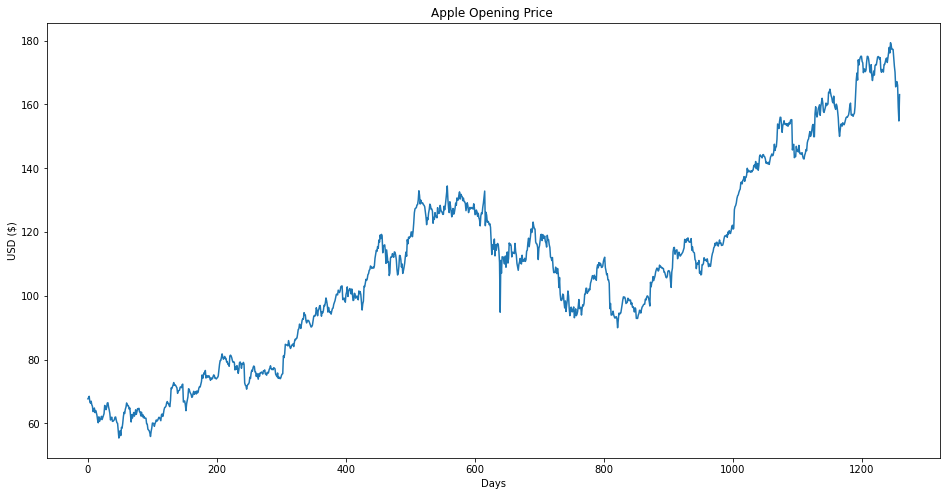

In [9]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple Opening Price ')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.plot(df['open'])
plt.show()

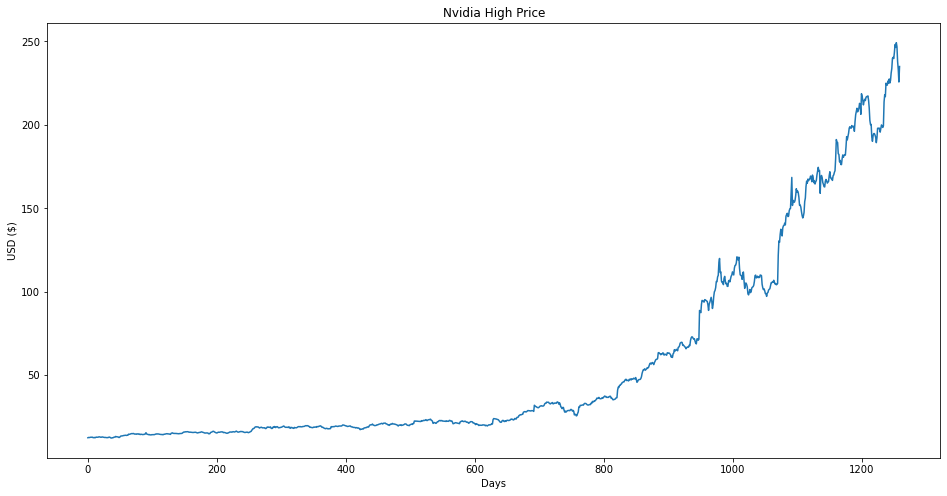

In [10]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Nvidia High Price')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.plot(df1['high'])
plt.show()

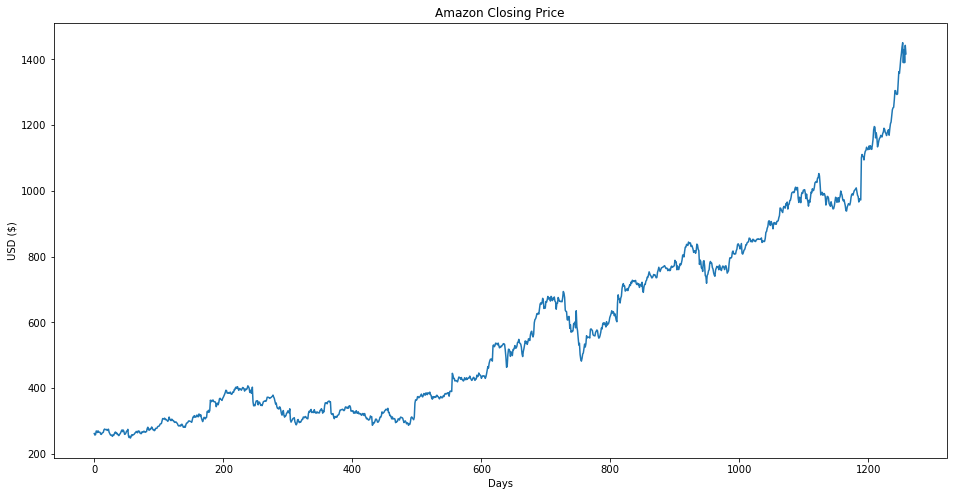

In [11]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Amazon Closing Price')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.plot(df2['close'])
plt.show()

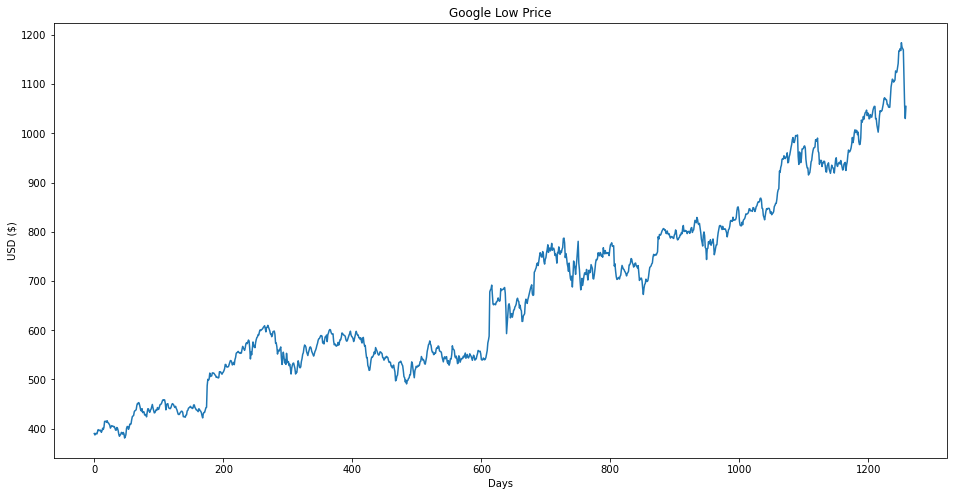

In [12]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google Low Price')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.plot(df3['low'])
plt.show()

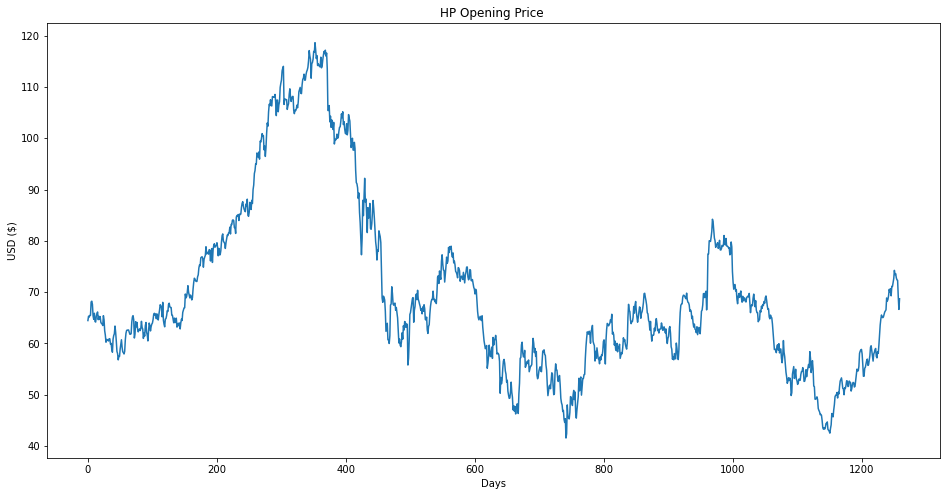

In [13]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('HP Opening Price ')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.plot(df4['open'])
plt.show()

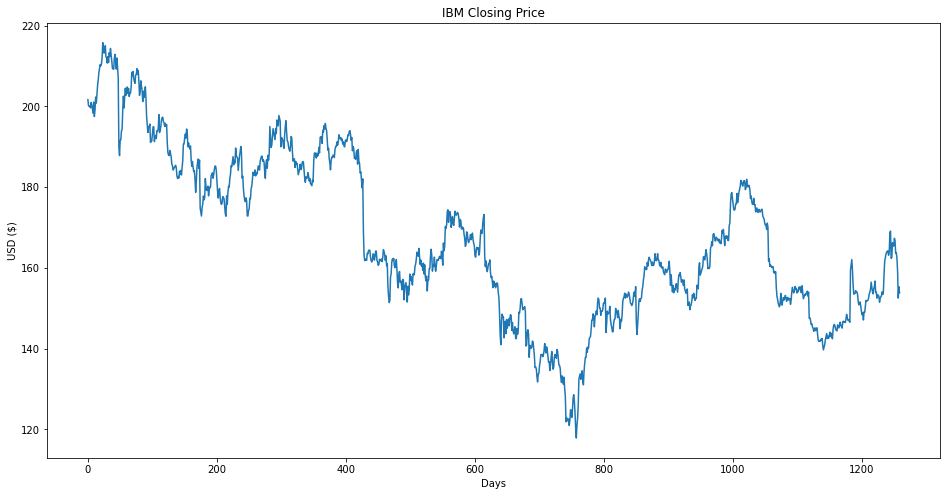

In [14]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('IBM Closing Price')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.plot(df5['close'])
plt.show()

<a name = "Cleaning"></a>
## 5. Data Cleaning

In [15]:
#Information about the data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7554 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7554 non-null   object 
 1   open    7554 non-null   float64
 2   high    7554 non-null   float64
 3   low     7554 non-null   float64
 4   close   7554 non-null   float64
 5   volume  7554 non-null   int64  
 6   Name    7554 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 472.1+ KB


In [16]:
data.shape

(7554, 7)

In [17]:
data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


There are no missing values the type of the variables that we need is float so that's perfect.

<a name = "Correlations"></a>
## 6.Correlations & Distributions 

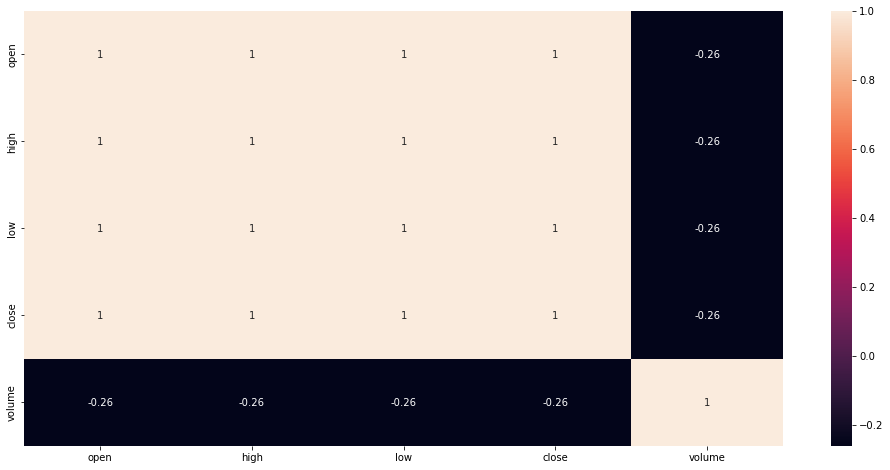

In [18]:
# Visualizing the correlations between all variables of the data.
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

For this dataset the label variable is "close" and from the correlation heatmap "open","high" and "low" are almost the same because they strongly correlated so I'm gonna take only the "open" variable and the "volume" variable as the features .

### Scatter Matrix

In [19]:
x = data[['open','volume']]
y = data[['close']]

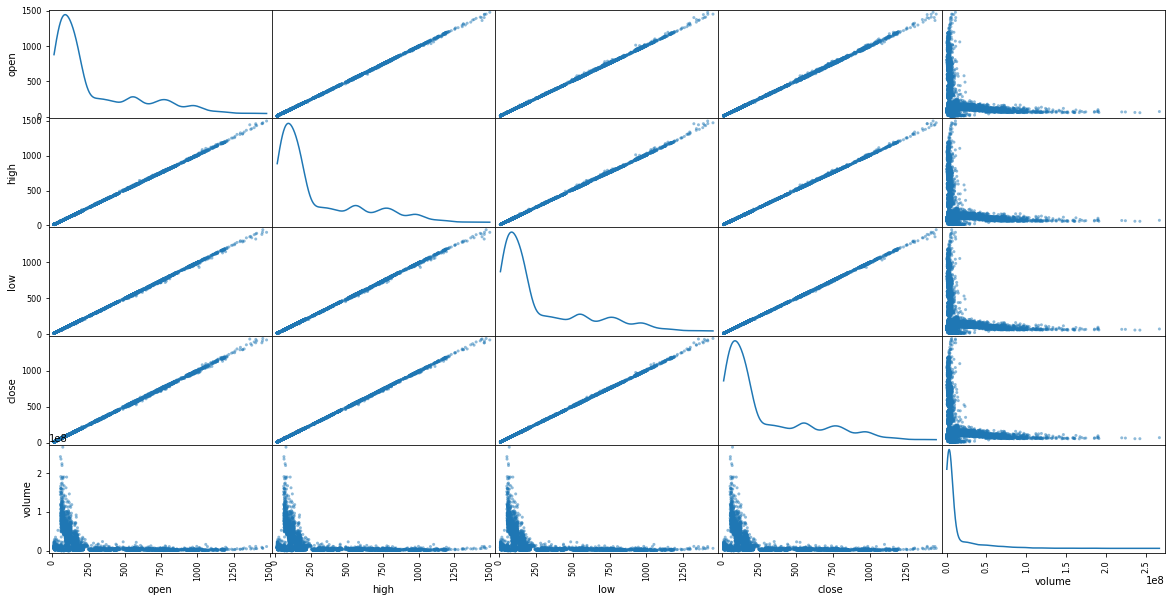

In [55]:
pd.plotting.scatter_matrix(data, alpha=0.5, figsize=(20, 10), diagonal='kde')
plt.show()

### Features Distributions 

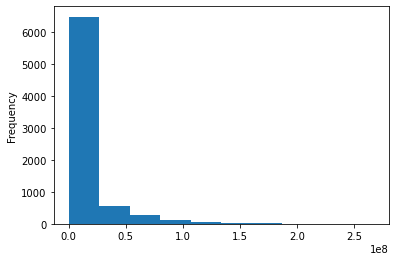

In [21]:
x['volume'].plot(kind='hist')
plt.show()

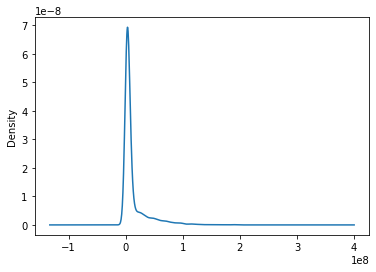

In [22]:
x['volume'].plot(kind='kde')
plt.show()

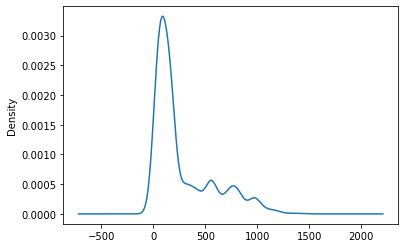

In [23]:
x['open'].plot(kind='kde')
plt.show()

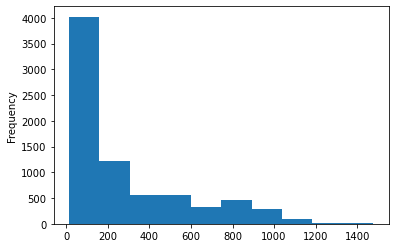

In [24]:
x['open'].plot(kind='hist')
plt.show()

The features distributions are not normal so were gonna transform it to a normal distribution .

### Normalisation 

#### Box-Cox Transformation

In [25]:
x['volume'],_ = pd.Series(stats.boxcox(x['volume']))

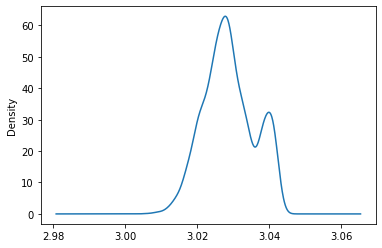

In [26]:
x['volume'].plot(kind='kde')
plt.show()

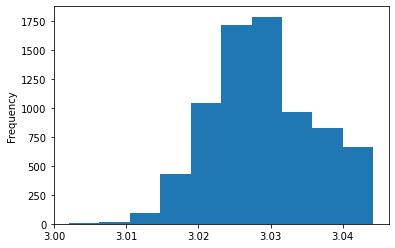

In [27]:
x['volume'].plot(kind='hist')
plt.show()

In [28]:
x['open'],_ = pd.Series(stats.boxcox(x['open']))

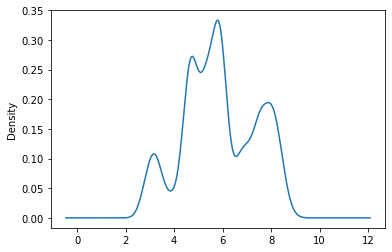

In [29]:
x['open'].plot(kind='kde')
plt.show()

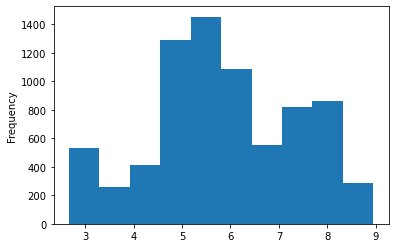

In [30]:
x['open'].plot(kind='hist')
plt.show()

### Target Variable Distribution 

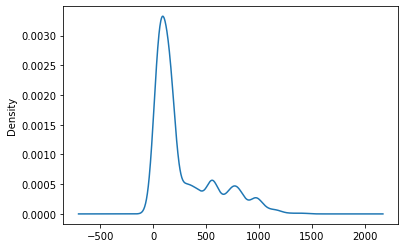

In [31]:
y['close'].plot(kind='kde')
plt.show()

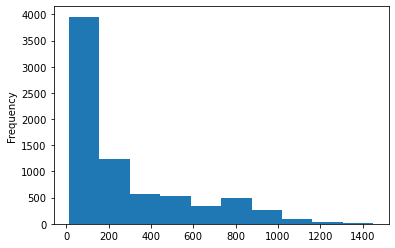

In [32]:
y['close'].plot(kind='hist')
plt.show()

### Normalisation 

#### Box-Cox Transformation

In [33]:
y['close'],_ = pd.Series(stats.boxcox(y['close']))

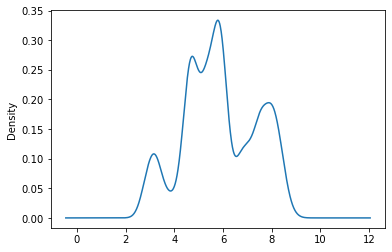

In [34]:
y['close'].plot(kind='kde')
plt.show()

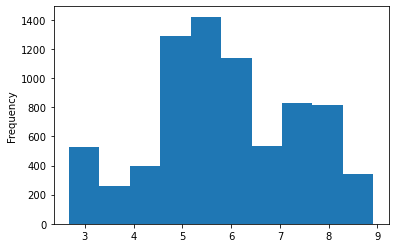

In [35]:
y['close'].plot(kind='hist')
plt.show()

Now after all variable are normally distributed let's go ahead and split the data .


<a name = "Splitting"></a>
## 7.Splitting the Data

In [36]:
x.head()

,open,volume
0,4.734093,3.043284
1,4.740701,3.042852
2,4.748613,3.043199
3,4.715980,3.042668
4,4.708735,3.041982


In [37]:
y.head()

,close
0,4.735689
1,4.748710
2,4.716842
3,4.714452
4,4.713324


In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 7)

<a name = "Model"></a>
## 8.Model training

Let's fit ou model I chose the XGBoost regression model.

In [39]:
clf = XGBRegressor() #XGBRegressor Model 
clf.fit(x_train,y_train)
y_pred= clf.predict(x_test)
print(type(y_pred))
print(y_pred.shape)
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(1511,)
<class 'pandas.core.frame.DataFrame'>
(1511, 1)


To visualize the predictions we need to convert the predictions stored in y_pred from a numpy array to a dataframe .

In [40]:
pred= pd.DataFrame(y_pred)
pred.shape

(1511, 1)

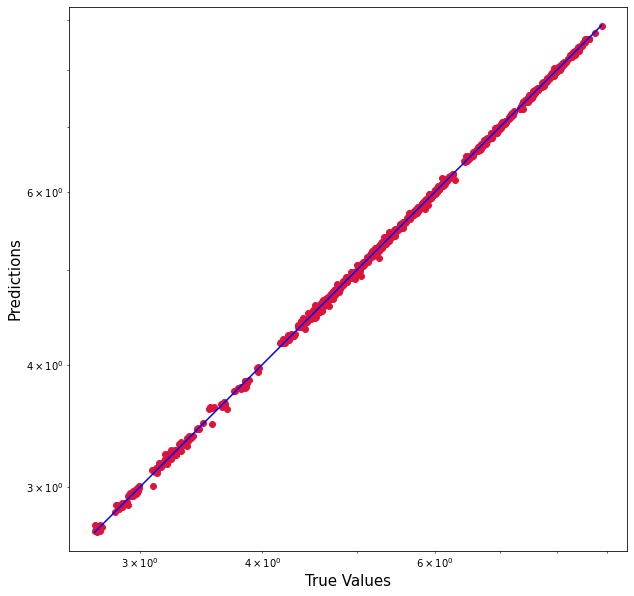

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred.values), max(y_test.values))
p2 = min(min(pred.values), min(y_test.values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<a name = "Predictions"></a>
## 9.Test set predictions

Here I converted the y_test dataframe to an numpy array to visualize it with y_pred.

In [42]:
test= y_test.to_numpy()
print(type(test))
print(test.shape)
y_pred=y_pred.reshape(-1,1)
print(y_pred.shape)

<class 'numpy.ndarray'>
(1511, 1)
(1511, 1)


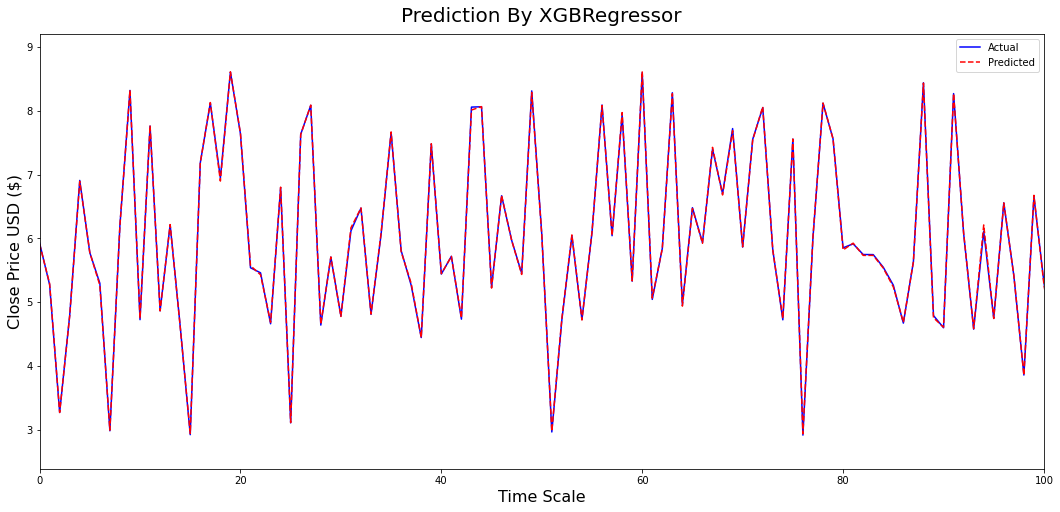

In [43]:
# Visualizing the predicted closing prices and the original closing prices.
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(test, color='blue', label='Data 1')
ax.plot(y_pred, color='red', label='Data 2',linestyle="dashed")

plt.xlabel("Time Scale", fontdict={'fontsize':16})
plt.ylabel("Close Price USD ($)", fontdict={'fontsize':16})
plt.title("Prediction By XGBRegressor", fontdict={'fontsize':20}, pad=12)

ax.legend(["Actual","Predicted"])
plt.xlim(0,100) 

plt.show()

#### R-Squared(Coefficient of determination)

In [44]:
clf.score(x_test,y_test)

0.9997922562482284

#### MSE(mean squared error)

In [45]:
errors = mean_squared_error(y_test, y_pred)
print(errors)

0.0004503896790761608


#### RMSE(root mean squared error)

In [46]:
errors = mean_squared_error(y_test, y_pred,squared=False)
print(errors)

0.02122238627195728


I think that my model did really good job looking at the numbers but I want to try another model using cross validation let's try a simple linear regression model.

### Cross-Validation 

#### Linear Regression 

In [47]:
#KFold cross-validation with 10 folds 
kf = KFold(n_splits=10,shuffle=True,random_state=7)
reg = LinearRegression()
cv_results =cross_val_score(reg,x,y,cv=kf)

In [48]:
print(cv_results)

[0.99985055 0.99983157 0.9998432  0.99986566 0.99985445 0.99986863
 0.99984243 0.99985483 0.99986521 0.9998396 ]


In [49]:
print(np.mean(cv_results), np.std(cv_results))

0.999851615036658 1.1800829829531678e-05


In [50]:
print(np.quantile(cv_results,[0.025,0.975]))

[0.99983338 0.99986797]


Let's try the cross-validation with ou first model the XGBoostRegressor.

#### XGBoostRegressor

In [51]:
#KFold cross-validation with 10 folds 
kf1 = KFold(n_splits=10,shuffle=True,random_state=7)
cv_results1 =cross_val_score(clf,x,y,cv=kf)

In [52]:
print(cv_results1)

[0.99980672 0.99980008 0.99979628 0.99981011 0.99979851 0.99981316
 0.99978433 0.99979722 0.99982243 0.99979879]


In [53]:
print(np.mean(cv_results1), np.std(cv_results1))

0.9998027622093668 1.0088611756679225e-05


In [54]:
print(np.quantile(cv_results1,[0.025,0.975]))

[0.99978702 0.99982034]
